1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Answer: The first matrik has n rows and k Columns, and the second matrix has k rows and m columns. so if a (n, k )matrix is multiplied to a (k , m) matrix the resulting matrix will be of the form (n, m) i.e, it has n rows and m columns. 

SO we can say the resulting matrix has n x m = nm final number of elements. 
If we find the number of multiplications and additons taken place to form each element of final matrix then we can find the total number of multiplications and additons required to form the final matrix. 

The Multiplications of matrix follows in a way such the row of first matrix is multiplied to column of second matrix ton form an element. 
So K mulitiplications and k-1 additons between those multiplications takes place to form an element in final matrix. 

Total number of multiplications = n x m x k = nmk. 
Total number of Additons = n x m x (k-1) = nm(k-1). 


2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Answer: 

In [44]:
import time # to caluculate the difference betweent two methods

def listoflists(M1,M2):
    n = len(M1)
    k = len(M1[0])
    m = len(M2[0])
    # Initialize the result matrix with zeros
    result = [[0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for x in range(k):
                result[i][j] += M1[i][x] * M2[x][j]

    return result

# We are creating example matrices
n, k, m =  50, 50, 50
M1 = [[i - j for j in range(k)] for i in range(n)]
M2 = [[i + j for j in range(m)] for i in range(k)]

T1= time.time()
FINALMATRIX = listoflists(M1,M2)
T2 = time.time()

print("Time taken using lists of lists:", T2 - T1 , "seconds")




Time taken using lists of lists: 0.04070162773132324 seconds


In [45]:
import numpy as np
import time

# Define matrices using NumPy arrays
n, k, m = 50, 50 , 50
M1 = np.array([[i - j for j in range(k)] for i in range(n)])
M2 = np.array([[i - j for j in range(m)] for i in range(k)])

# Multiply matrices using NumPy
T1 = time.time()
FINALMATRIX = np.dot(M1, M2)
T2 = time.time()

print("time taken using numpy:", T2 - T1, "seconds")

time taken using numpy: 0.003017902374267578 seconds


By comparing both times we can say that calculating multiplication using numpy takes less time than using list of lists. 

3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Answer:Finding the median through numpy is easier and faster than finding the median through a pass-based approach. The pass-based approach takes approximately O(n) 
time to find a median.Other methods like quicksort and merge sort takee O(nlogn) time.).

In [21]:
import numpy as np
import time

def using_numpy(arr):
    return np.median(arr)

# Generate a sample array
array = np.random.randint(1, 100, size=1000)

#Time taken using numpy..
T1 = time.time()
median = using_numpy(array)
T2 = time.time()

print("Median found using efficient approach (NumPy):", median)
print("Time taken by efficient approach (NumPy):", T2 - T1, "seconds")

Median found using efficient approach (NumPy): 50.0
Time taken by efficient approach (NumPy): 0.0017251968383789062 seconds


In [24]:
import random
import time

def using_passmethod(arr):
    n = len(arr)
    for _ in range(n // 2 + 1):
        max_value = max(arr)
        arr.remove(max_value)
    return max_value

# Generate a sample array
array = [random.randint(1, 100) for _ in range(1000)]

# Time taken using pass-method 
T1 = time.time()
median = using_passmethod(array)
T2 = time.time()

print("Median found using passmethod:", median)
print("Time taken using passmethod:", T2 - T1, "seconds")

Median found using passmethod: 50
Time taken using passmethod: 0.015717506408691406 seconds


4. #Answer: 
 gradient of the function f(x, y) = (x^2)y + (y^3)sin(x) with respect to x and y, lets calculate the partial derivatives
of f with respect to x and y.

Now,
f(x, y) = (x^2)y + (y^3)sin(x)

Let's find the partial derivatives:

Differentiating f with respect to x while keeping y as a constant:
df/dx = 2xy + (y^3)cos(x)

Differentiating f with respect to y while keeping x as a constant:
df/dy = x^2 + 3(y^2)(sin(x))
delta f(x, y) = (df/dx,df/dy) = (2xy + (y^3)cos(x),x^2 + 3(y^2)(sin(x)))

5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [5]:
import jax
import jax.numpy as jnp

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

gradient = jax.grad(f, argnums=(0, 1))

# Lets take random x and y values to find the anyalytical gradient 
randomx = 3.0  
randomy = 4.0  

# caluculate gradient 
gradx = 2 * randomx * randomy + randomy**3 * jnp.cos(randomx)
grady = randomx**2 + 3 * randomy**2 * jnp.sin(randomx)

# Calculate the gradient using JAX
jax_grad_x, jax_grad_y = gradient(randomx, randomy)

# Compare the analytical solution with JAX's result
print("Analytical gradient wrt x:", gradx)
print("JAX gradient wrt x:", jax_grad_x)
print("Analytical gradient wrt y:", grady)
print("JAX gradient with wrt:", jax_grad_y)
#Here both JAX and analytical gradient are showing same results for random values of x and y 


Analytical gradient with respect to x: -39.35952
JAX gradient with respect to x: -39.35952
Analytical gradient with respect to y: 15.77376
JAX gradient with respect to y: 15.77376


6. Use sympy to confirm that you obtain the same gradient analytically.

In [8]:
#Answer: 
import sympy as sp

# Define symbols for x and y
x, y = sp.symbols('x y')

# Define the function f(x, y)
f = x**2 * y + y**3 * sp.sin(x)

# using sympy library find the differentiation of f with respect to x and y 
gradx= sp.diff(f, x)
grady = sp.diff(f, y)

# Print the gradients obtained from sympy
print("Gradient of f with respect to x (SymPy):", gradx)
print("Gradient of f with respect to y (SymPy):", grady)

Gradient of f with respect to x (SymPy): 2*x*y + y**3*cos(x)
Gradient of f with respect to y (SymPy): x**2 + 3*y**2*sin(x)


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

Answer: 

In [26]:
#Lets create a RECORD for storing details of students using nested dictionary 
RECORD = {
    2022: {
        'Branch 1': {
            1: {'Name': 'Vinay', 'Marks': {'Maths': 98, 'English': 80}},
            2: {'Name': 'Ramu', 'Marks': {'Maths': 95, 'English': 80}},
        },
        'Branch 2': {
            1: {'Name': 'Ajay', 'Marks': {'Maths': 95, 'English': 90}},
            2: {'Name': 'Vijay', 'Marks': {'Maths': 95, 'English': 75}},
        }
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'Rahul', 'Marks': {'Maths': 90, 'English': 96}},
            2: {'Name': 'Raju', 'Marks': {'Maths': 80, 'English': 99}},
        },
        'Branch 2': {
            1: {'Name': 'Arun', 'Marks': {'Maths': 71, 'English': 80}},
            2: {'Name': 'Manish', 'Marks': {'Maths': 87, 'English': 71}},
        },
    },
    2024: {
        'Branch 1': {
            1: {'Name': 'Riya', 'Marks': {'Maths': 97, 'English': 78}},
            2: {'Name': 'Kiran', 'Marks': {'Maths': 81, 'English': 90}},
        },
        'Branch 2': {
            1: {'Name': 'Babu', 'Marks': {'Maths': 80, 'English': 80}},
            2: {'Name': 'Viraj', 'Marks': {'Maths': 95, 'English': 67}},
        },
    },
    2025: {
        'Branch 1': {
            1: {'Name': 'Aman', 'Marks': {'Maths': 69, 'English': 90}},
            2: {'Name': 'Naman', 'Marks': {'Maths': 45, 'English':66}},
        },
        'Branch 2': {
            1: {'Name': 'Venu', 'Marks': {'Maths': 30, 'English': 100}},
            2: {'Name': 'Uday', 'Marks': {'Maths': 65, 'English': 90}},
        },
    }
}

# Printing the nested dictionary representing student records
for year, branch in RECORD.items():
    print(year)
    for branch, students in branch.items():
        print(f" {branch}")
        for rollnumber, studentinfo in students.items():
            print(f"  Roll Number: {rollnumber}, Name: {studentinfo['Name']}, Marks: {studentinfo['Marks']}")
        
        
        



2022
 Branch 1
  Roll Number: 1, Name: Vinay, Marks: {'Maths': 98, 'English': 80}
  Roll Number: 2, Name: Ramu, Marks: {'Maths': 95, 'English': 80}
 Branch 2
  Roll Number: 1, Name: Ajay, Marks: {'Maths': 95, 'English': 90}
  Roll Number: 2, Name: Vijay, Marks: {'Maths': 95, 'English': 75}
2023
 Branch 1
  Roll Number: 1, Name: Rahul, Marks: {'Maths': 90, 'English': 96}
  Roll Number: 2, Name: Raju, Marks: {'Maths': 80, 'English': 99}
 Branch 2
  Roll Number: 1, Name: Arun, Marks: {'Maths': 71, 'English': 80}
  Roll Number: 2, Name: Manish, Marks: {'Maths': 87, 'English': 71}
2024
 Branch 1
  Roll Number: 1, Name: Riya, Marks: {'Maths': 97, 'English': 78}
  Roll Number: 2, Name: Kiran, Marks: {'Maths': 81, 'English': 90}
 Branch 2
  Roll Number: 1, Name: Babu, Marks: {'Maths': 80, 'English': 80}
  Roll Number: 2, Name: Viraj, Marks: {'Maths': 95, 'English': 67}
2025
 Branch 1
  Roll Number: 1, Name: Aman, Marks: {'Maths': 69, 'English': 90}
  Roll Number: 2, Name: Naman, Marks: {'Maths

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

9. Plotting the functions
    9.1. y = x

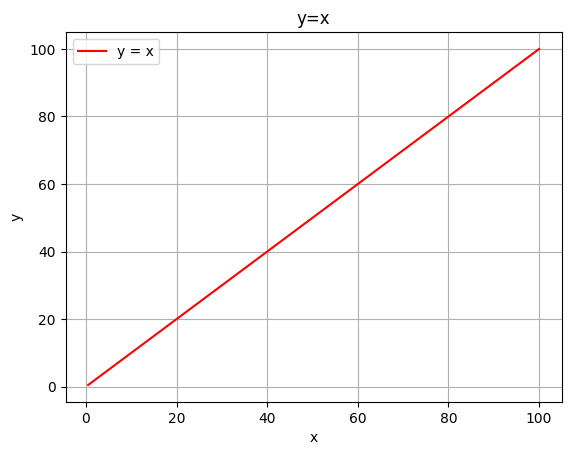

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
x = np.linspace(0.5, 100 , 199)
y = x 
plt.plot(x, y, label= 'y = x', color = 'red')
plt.title('y=x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()



    9.2. y = x^2

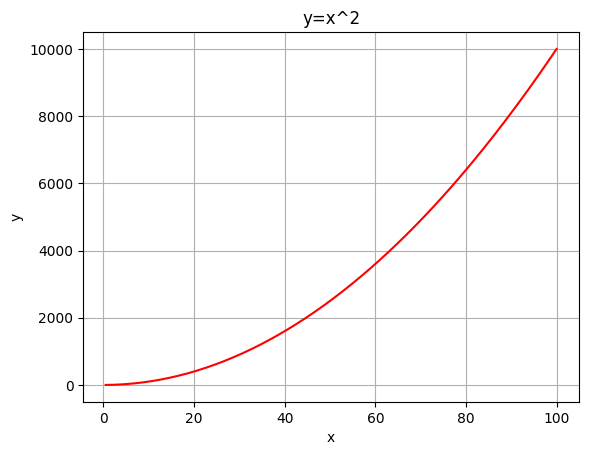

In [11]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
x = np.linspace(0.5, 100 , 199)
y = x ** 2
plt.plot(x, y, label= 'y = x^2', color = 'red')
plt.title('y=x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

    9.3. y = x^3/100

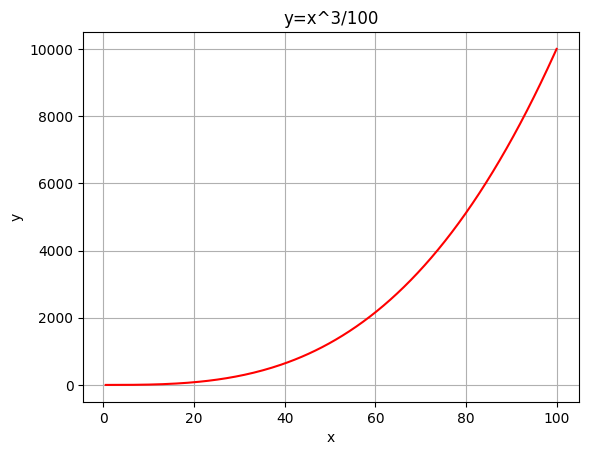

In [12]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
x = np.linspace(0.5, 100 , 199)
y = (x ** 3)/100
plt.plot(x, y, label= 'y = x^3/100', color = 'red')
plt.title('y=x^3/100')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

    9.4. y = sin(x)

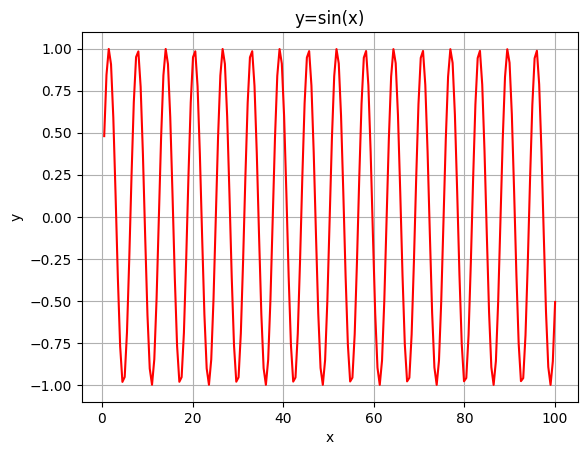

In [13]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
x = np.linspace(0.5, 100 , 199)
y = np.sin(x)
plt.plot(x, y, label= 'y = sin(x)', color = 'red')
plt.title('y=sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

    5. y = sin(x)/x

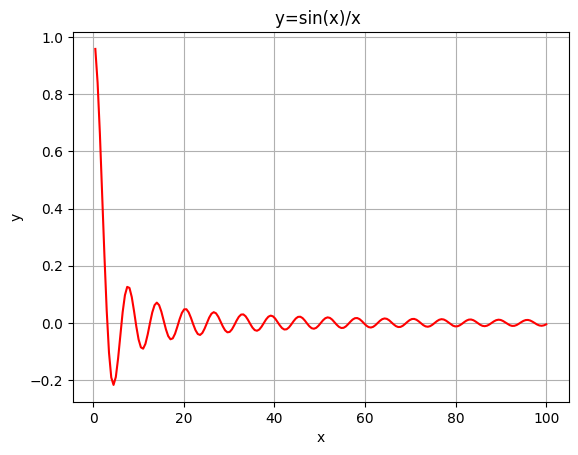

In [14]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
x = np.linspace(0.5, 100 , 199)
y = np.sin(x) / x
plt.plot(x, y, label= 'y = sin(x)/x', color = 'red')
plt.title('y=sin(x)/x ')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

    9.6. y = log(x) 

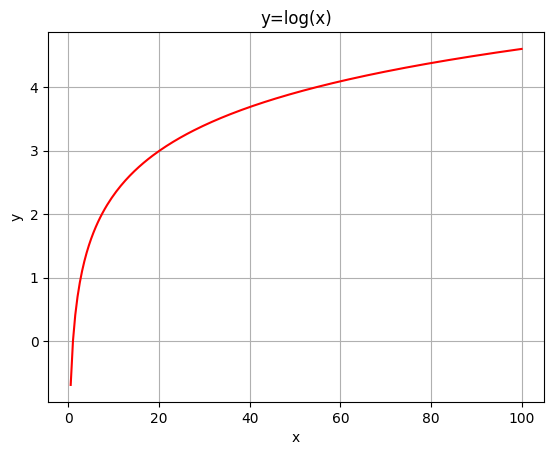

In [15]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
x = np.linspace(0.5, 100 , 199)
y = np.log(x)
plt.plot(x, y, label= 'y = log(x)', color = 'red')
plt.title('y=log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

    9.7. y = e^x 

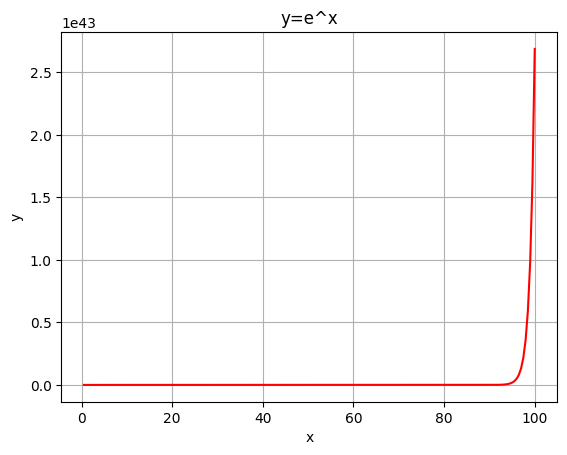

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
x = np.linspace(0.5, 100 , 199)
y = np.exp(x)
plt.plot(x, y, label= 'e^x', color = 'red')
plt.title('y=e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [20]:
#Answer: 
import numpy as np
import pandas as pd

# Generating a matrix of size 20 x 5 using only 1 or 2 
matrix = np.random.uniform(1, 2, size=(20, 5))

# Lets create data frame for a matrix 
df = pd.DataFrame(matrix, columns=['A', 'B', 'C', 'D', 'E'])

# the column with the highest standard deviation
stddev = df.std()
high_stdev_col = stddev.idxmax() # Finding the comlu with highest standard deviation

# Find the row with the lowest mean
mean = df.mean(axis=1)        # axis =1 represents column and axis = 0 or index represent rows
lowestmeanrow = mean.idxmin()   # Row with lowesr mean

print("The column with the highest standard deviation is:", high_stdev_col)
print("The row with the lowest mean is:", lowestmeanrow)


The column with the highest standard deviation is: A
The row with the lowest mean is: 6


11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

12. Write a small piece of code to explain broadcasting in numpy.

Answer: Broadcasting in numpy is used to simplify the array operations by automatically adjusting the dimensions and shapes. This feature eliminates the need fort manual reshaping, Thereby facilitating the complex computations with ease.

Here is the small example of broadcasting:

In [28]:
import numpy as np 
#let us take example of addtion of a [2,3] to an integer and check the application of broadccasting in it

int = 5
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])

result = int + matrix
print(result) 
#with braodcasting it automatically added both the int and matrix! 

[[ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

Answer: 

In [26]:
#Let us take an example array 
import numpy as np 
A = [9, 7, 8, 2, 4, 1, 6] #inex of minum element here is "5"
arr = np.array([9, 7, 8, 2, 4, 1, 6])
leastv = arr[0] #fixing the minimum value 
leasti = 0 #fixing the index of least value 
def f(x): 
    leastv = arr[0] #fixing the minimum value 
    leasti = 0 #fixing the index of least value 
    for i in range (1,len(arr)):
        if(arr[i]< leastv) :
            leastv = arr[i]
            leasti = i
    return leasti
print(f(arr))
print(np.argmin(arr))
#Here both the above function will return the index of least element in the array i.e., 1 which is same the output provided by argmin. 
        

5
5
